# Exercise 1.1
Load an image and compute the full SVD.
-  A. Choose a rank $r< m$ and comfirm that the matrix $U^*U$ is the $r\times r$ identity matrix.
-  B. Confirm that $UU^*$ is *not* the identity matrix.
-  C. Comptue the norm of the error between $UU^*$ and the $n\times n$ identity matrix as the rank $r$ varies from $1$ to $n$ and plot the error. 

## 📝 Prelimnary Notes

- $U\in\mathbb{R}^{m\times m}$ is an orthonormal matrix and its columns are called the **left singular vectors** of $X$.
    - The first $r$ columns of $U$, $\{\bold{u}_1, \bold{u}_2, \dots, \bold{u}_r\}$ form an orthonormal basis for $\text{Col}(X)$.
    - The remaining $m-r$ columns of $U$, $\{\bold{u}_{r+1}, \bold{u}_{r+2}, \dots, \bold{u}_m\}$ form an orthonormal basis for $\text{Null}(A^T)$.
- $\Sigma\in\mathbb{R}^{m\times n}$ has the structure $$_m \Sigma_n = \begin{bmatrix} _r\tilde{\Sigma}_r & _r \bm{0}_{n-r} \\ _{m-r} \bm{0}_{r} & _{m-r} \bm{0}_{n-r} \end{bmatrix}$$ where $\tilde{\Sigma}$ is a diagonal matrix whose entries are called **singular values** of $X$ and appear in decreasing order (i.e., $\sigma_1 \ge \sigma_2 \ge \dots \ge \sigma_r$). 
- $V\in\mathbb{R}^{n\times n}$ is an orthonormal matrix and its columns are called the **right singular vectors** of $X$.
    - The first $r$ columns of $V$, $\{ \bold{v}_1, \bold{v}_2, \dots, \bold{v}_r \}$ form an orthonormal basis for $\text{Row}(X)$.
    - The remaining $n-r$ columns of $V$, $\{ \bold{v}_{r+1}, \bold{v}_{r+2}, \dots, \bold{v}_n \}$ form an orthonormal basis for $\text{Null}(A)$

Big Ideas:
- $U$ and $V$ are both orthonormal matrices $\therefore U^{-1}=U^T$ and $V^{-1}=V^T$ 

---
- 📜 [Linear Algebra Cheat Sheet 2](https://lshriver-portfolio.replit.app/static/pdfs/notes/cheatsheets/linear_algebra_cheatsheet_part2.pdf)
- 📜 [Prof Won Math | Lecture 20 | Singular Value Decomposition Basics](https://lshriver-portfolio.replit.app/static/pdfs/notes/prof_won_math/singular_value_decomposition.pdf)

## Load an image and compute the full SVD

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from IPython.display import display, Latex, Math

# Load the image
A = imread('/workspaces/steve-brunton-book/images/logo.png')
X = np.mean(A, -1)  # Convert to grayscale

m, n = X.shape
print("Image shape: ", X.shape)

# Take the SVD
U, S, Vh = np.linalg.svd(X, full_matrices=True)
V = Vh.conj().T

Sigma = np.zeros((m, n))
np.fill_diagonal(Sigma, S)

print(f"Image shape:  {X.shape}")
print(f"U shape:      {U.shape}")
print(f"Sigma shape:  {Sigma.shape}")
print(f"V shape:      {V.shape}")

Image shape:  (450, 450)
Image shape:  (450, 450)
U shape:      (450, 450)
Sigma shape:  (450, 450)
V shape:      (450, 450)


## Part A
Choose a rank $r<m$ and confirm that the matrix $U^*U$ is the $r\times r$ identity matrix.

In [12]:
import random
from IPython.display import display, Latex

#r = random.randint(1, X.shape[0])   # Choose a random rank
r = 10  # Choose a fixed rank
print(f"Rank:        {r}")

# Truncated U (only the first r columns -- i.e., an orthonormal basis for Col(X))
U_r = U[:, :r]
print(f"U_r shape:   {U_r.shape}")

# Compute U_r^* * U_r
I_r_approx = np.dot(U_r.conj().T, U_r)
print(f"I_r_approx shape:   {I_r_approx.shape}")

# Check the difference from the idenity
error_I_r_approx = np.linalg.norm(I_r_approx - np.eye(r))
print(f"Error from identity: {error_I_r_approx}")

# Check if error is close enough to zero
if error_I_r_approx < 1e-6:
    display(Latex(r"✅ $U_r^* U_r$ is close to the identity matrix."))
else:
    display(Latex(r"❌ $U_r^* U_r$ is NOT close to the identity matrix."))

Rank:        10
U_r shape:   (450, 10)
I_r_approx shape:   (10, 10)
Error from identity: 3.645655051102724e-07


<IPython.core.display.Latex object>

## Part B
Confirm that $UU^*$ is *not* an approximation of the identity matrix.

P shape:      (450, 450)
Error from identity: 20.976176964285425


<IPython.core.display.Latex object>

Text(0.5, 1.0, 'Absolute difference between $P=UU^*$ and $I_m$')

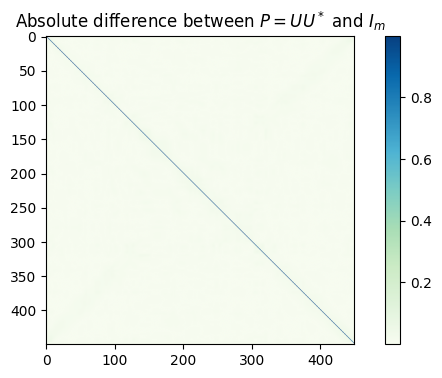

In [14]:
# Compute the projection matrix
P = np.dot(U_r, U_r.conj().T)
print(f"P shape:      {P.shape}")

# Compare P to the mxm identity matrix
error_P = np.linalg.norm(P - np.eye(m))
print(f"Error from identity: {error_P}")

# Check if error is close enough to zero
if error_P < 1e-6:
    display(Latex(r"✅ $P$ is close to the identity matrix."))
else:
    display(Latex(r"❌ $P$ is NOT close to the identity matrix."))

plt.figure(figsize=(8, 4))
plt.imshow(np.abs(P - np.eye(m)), cmap='GnBu')

plt.colorbar()
plt.title(r"Absolute difference between $P=UU^*$ and $I_m$")

### Visualization Results


✨ Recall that U_r consists of the first r columns of U and that these columns are orthonormal. This means two things:

1. When you compute U_r*U_r (the conjugate transpose times U_r), you get the r×r identity matrix.  
2. However, when you compute U_r U_r* (or U_r U_rᵀ for real data), this product is a projection matrix onto the r-dimensional subspace spanned by the columns of U_r.

A projection matrix, by its nature, behaves like the identity on the subspace it projects onto, but not necessarily on the entire space. In other words:

• If you take any vector that lies in the column space of U_r, applying P = U_r U_r* returns that vector unchanged.  
• If you take a vector that is orthogonal to the column space of U_r, applying P returns the zero vector—not the original vector.

Because the projection matrix is only guaranteed to act as an identity on the column space, if your vector space is larger (i.e., if U_r is m×r with r < m), then P will differ from the full m×m identity matrix on the parts of the space outside that r-dimensional subspace. That is why the error ‖P – I_m‖ will not be zero—only on the column space of U_r does P exactly equal I.

So, when we say "P is a projection (i.e., only acting as identity on the column space of U_r) and hence the error is nonzero," it means exactly:

 – P = U_r U_r* is the identity only for vectors within the r-dimensional column space of U_r.  
 – For vectors outside that space, P does not reproduce those vectors, so the overall difference P − I_m, when measured (for example using a norm over the entire space), is nonzero.